# Comparación de  los métodos de regresión logística y de bayesiano ingenuo.

In [37]:
# -*- coding: utf-8 -*- 
# Librerias utilizadas
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.display import display

## Clasificación de Spam: (Utilizando la regresión logística)

## Carga de los datos de Spam:

In [38]:
df_spam =  pd.read_csv("nb_data/spam.csv",delim_whitespace=True,header=None)
df_spam.shape

(5172, 2001)

In [39]:
X = df_spam.as_matrix()

perm = np.random.permutation(X.shape[0])
X= X[perm,:]

X_train =  X[:int(X.shape[0] * 0.8),:]
X_test = X[int(X.shape[0] * 0.8):,:]

y_train= X_train[:,2000:2001]
y_train = y_train.reshape(4137,)
X_train= X_train[:,0:2000]

y_test= X_test[:,2000:2001]
X_test= X_test[:,0:2000]



In [49]:
def logistica(z):
    return 1 / (1 + np.exp(-z))

# calcula el gradiente 
def gradiente(X, y, p):
    return np.dot(X.T, p - y) / y.size

# realiza descenso del gradiente para regresión logística
def descenso_gradiente(X, y, umbral_convergencia = 0.01, alpha = 0.1):
    # inicializa los parámetros de forma aleatoria
    theta_anterior = np.zeros(X.shape[1])
    theta_nuevo = np.random.rand(X.shape[1])

    # calcula cambio entre parámetros nuevos y anteriores (distancia euclideana)
    distancia_theta = np.linalg.norm(theta_nuevo - theta_anterior)
    
    it = 0
    while distancia_theta > umbral_convergencia:
        # parámetros nuevos se vuelven los anteriores
        theta_anterior = theta_nuevo

        # calcula la probabilidad de que datos sean de la clase 1 con los parámetros anteriores
        p = logistica(np.dot(X, theta_anterior)) # p = logistica(X theta)

        # actualiza parámetros en la dirección del gradiente
        theta_nuevo = theta_anterior - alpha * gradiente(X, y, p)

        # calcula cambio entre parámetros nuevos y anteriores (distancia euclideana)
        distancia_theta = np.linalg.norm(theta_nuevo - theta_anterior)

        it = it + 1
        #print "Iteración", it, "theta_nuevo =", theta_nuevo,\
              #"Cambio =", distancia_theta

    return theta_nuevo,it

def get_ROC(y_score,y_train):
    fp_l = []
    tp_l=[]
    step = 0.01
    for i in range(0, 101):
        cutoff = i * step

        tp_count = 0 # true positives
        p_count = 0 # all positives, false or not

        fp_count = 0 # true negatives
        n_count = 0 # all negatives, false or not

        errors = 0
        count = 0

        for ind in range(len(y_score)):
            if float(y_score[ind])>= cutoff:
                if int(y_train[ind]) ==1:
                    tp_count= tp_count+1
                    p_count = p_count +1
                else:
                    fp_count = fp_count+1
                    n_count = n_count +1 
                    errors = errors+1
            else:
                if int(y_train[ind]) ==1:
                    p_count = p_count +1
                    errors = errors +1 
                else:
                    n_count = n_count +1 
            count = count + 1
        if n_count == 0:
            fp = 0
        else:
            fp = float(fp_count) / float(n_count)
        if p_count == 0:
            tp = 0
        else:
            tp = float(tp_count) / float(p_count)

        #print("%.4f %.4f %.4f" % (fp, tp, errors / count))
        #print("%.4f %.4f" % (fp, tp))
        fp_l.append(fp)
        tp_l.append(tp)
    return fp_l,tp_l

def plot_ROC(fp_l,tp_l,umbral,alpha):
    fig = plt.figure(num=None, figsize=(4,4), dpi=80, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    plt.plot(fp_l, tp_l,label='Here')
    ax.legend()
    plt.show()
    


# Modelos de regresión logistica con diferentes parametros. 

El numero de iteraciones que se realizaron fueron:33 
Con alpha = 0.100000 y un umbral =0.100000
El numero de iteraciones que se realizaron fueron:29 
Con alpha = 0.150000 y un umbral =0.100000


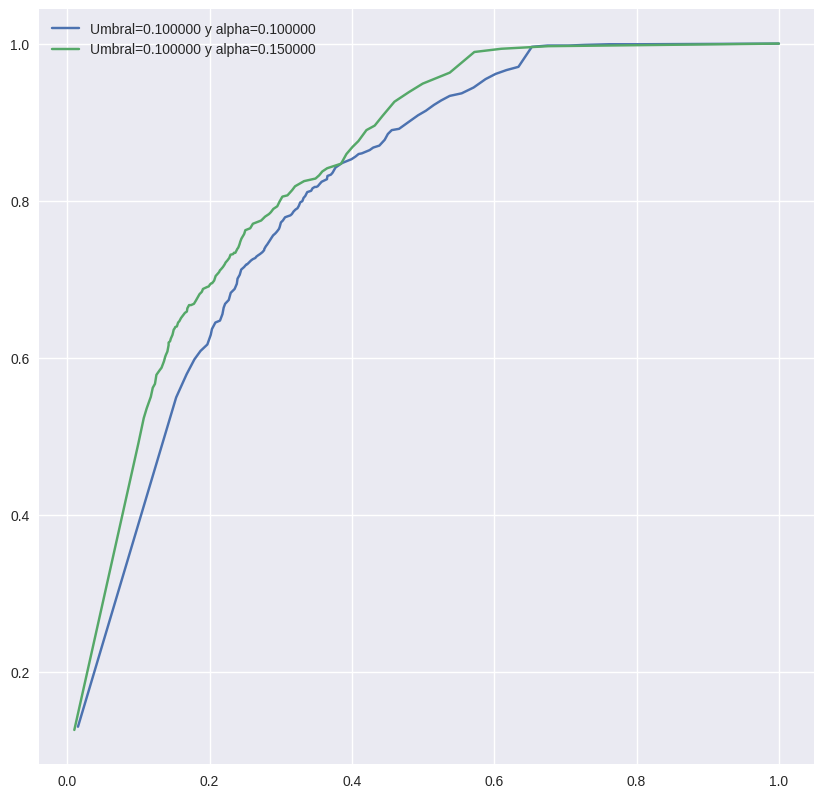

In [60]:
#umbrales_convergencia = [0.1,0.01,0.0001,0.0001]
#alpha_s = [0.1,0.15,0.2,0.5]

#Test_Code#
umbrales_convergencia = [0.1,0.01,0.0003]
alpha_s = [0.1,0.3,0.5,0.01]

for umbral in umbrales_convergencia:
    fig = plt.figure(num=None, figsize=(10,10), dpi=100, facecolor='w', edgecolor='k')
    ax = plt.subplot(111)
    ax.set_yscale('linear')
    for alp in alpha_s:
        theta_emv,N_iteraciones = descenso_gradiente(X_train, y_train,umbral_convergencia=umbral,alpha=alp)
        print "================================================================"
        print ("El numero de iteraciones que se realizaron fueron:%i \nCon alpha = %f y un umbral =%f" % (N_iteraciones,alp,umbral))
        print "================================================================" 
        y_score = logistica(np.dot(X_train, theta_emv))
        fp_l, tp_l = get_ROC(y_score,y_train)
        #print fp_l, tp_l
        plt.plot(fp_l, tp_l,label='Umbral=%f y alpha=%f'%(umbral,alp))
    ax.legend()
    plt.show()

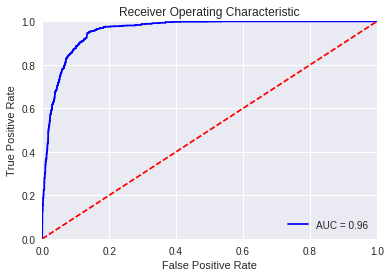

In [48]:

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_score)
roc_auc = auc(false_positive_rate, true_positive_rate)
#print false_positive_rate,true_positive_rate
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
